In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data2 = pd.read_csv("C:\\Users\\Rishu Jaiswal\\Maths_Customer_Segmentation\\Mall_Customers.csv")

In [3]:
data2

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data2.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


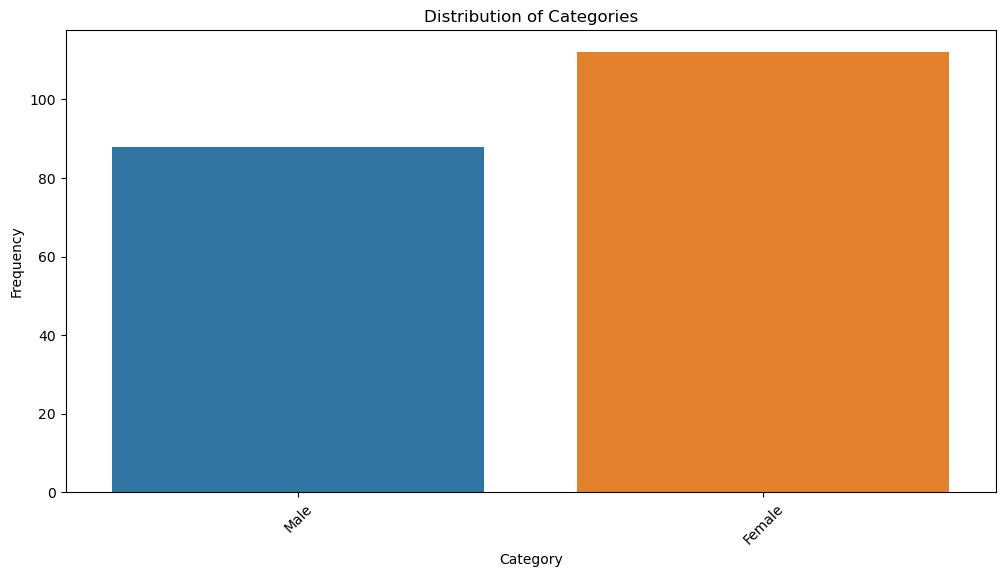

In [6]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a count plot
sns.countplot(x='Gender', data=data2)

# Plot formatting
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Show the plot
plt.show()


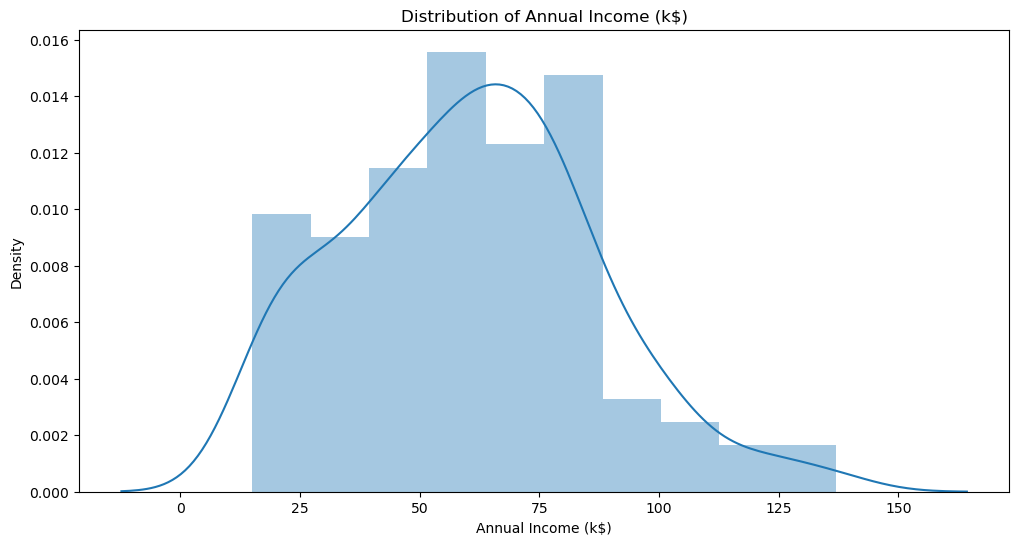

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

sns.distplot(data2['Annual Income (k$)']);

# Plot formatting
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Density')

# Show the plot
plt.show()

In [8]:
data2.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

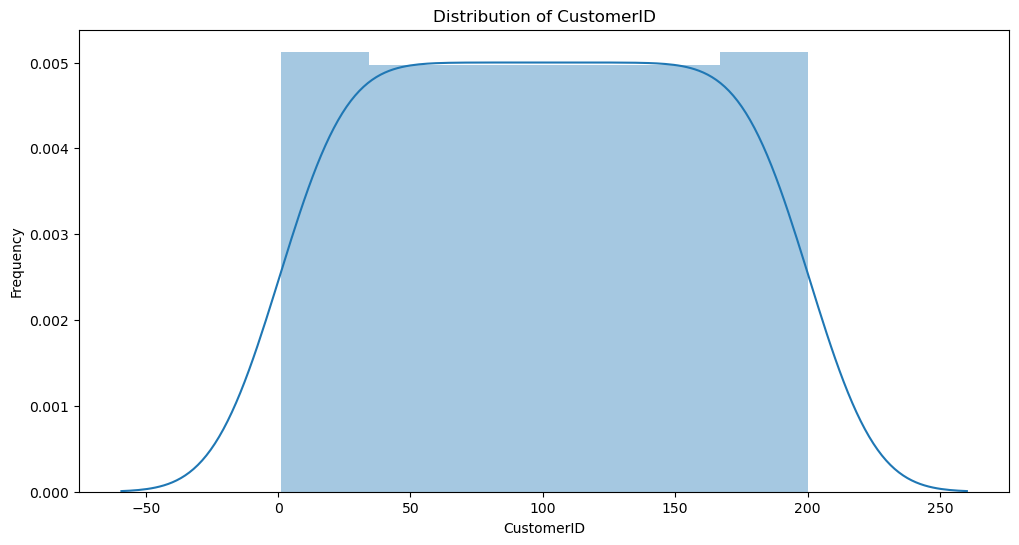

Skipping Gender as it is not numeric.


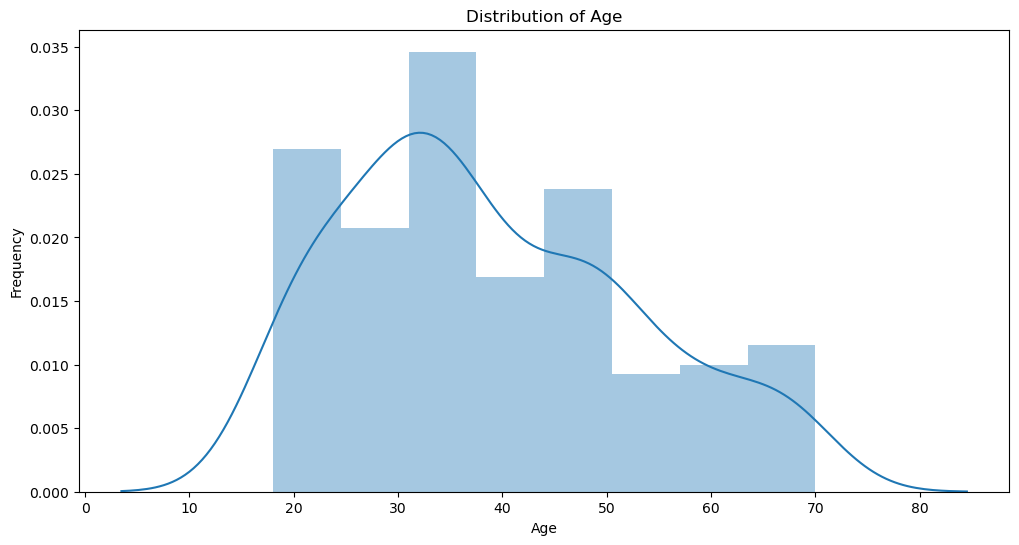

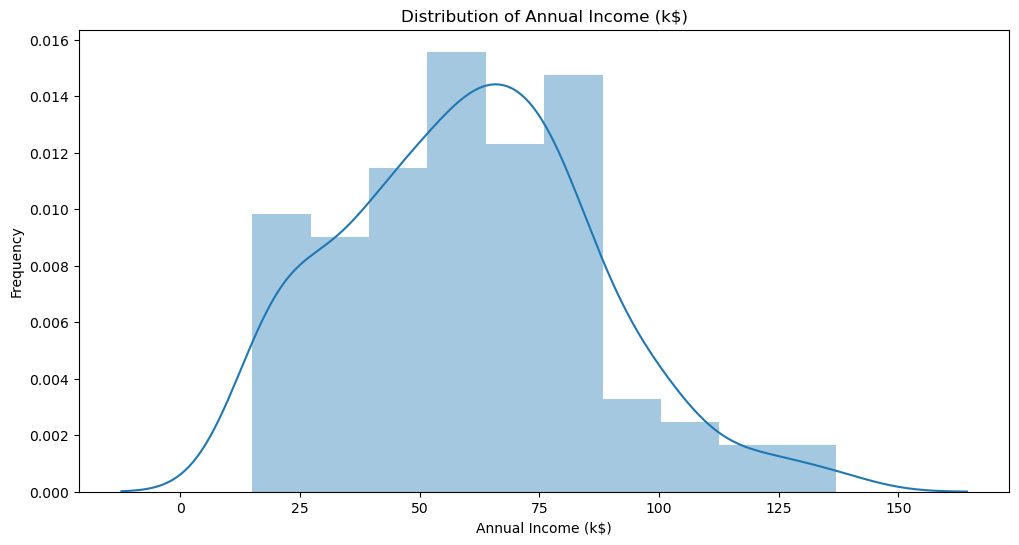

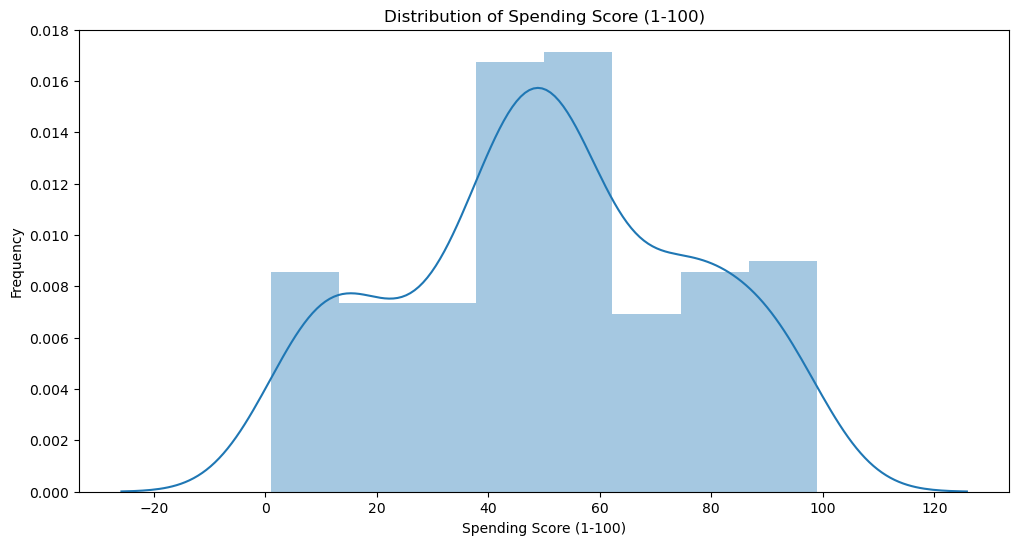

In [9]:
columns = ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Iterate over the columns of the DataFrame
for column in columns:
    if data2[column].dtype in ['float64', 'int64']:  # Checks if the column is numeric
        plt.figure(figsize=(12, 6))
        # Using histplot with a KDE line for numeric data
        sns.distplot(data2[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f'Skipping {column} as it is not numeric.')


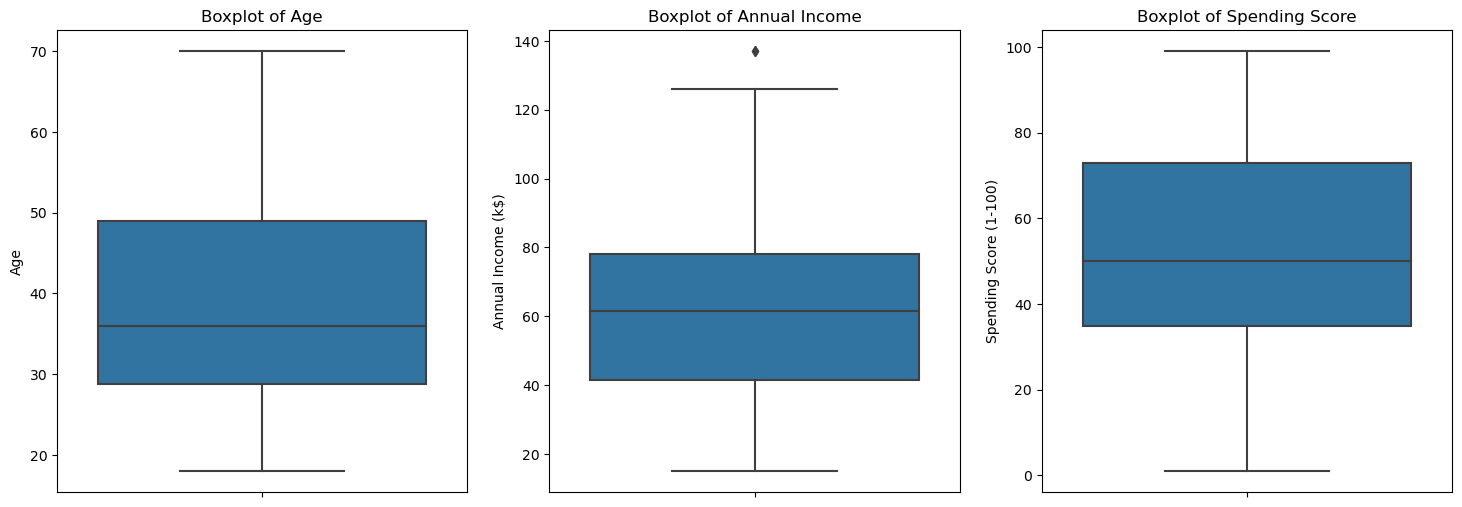

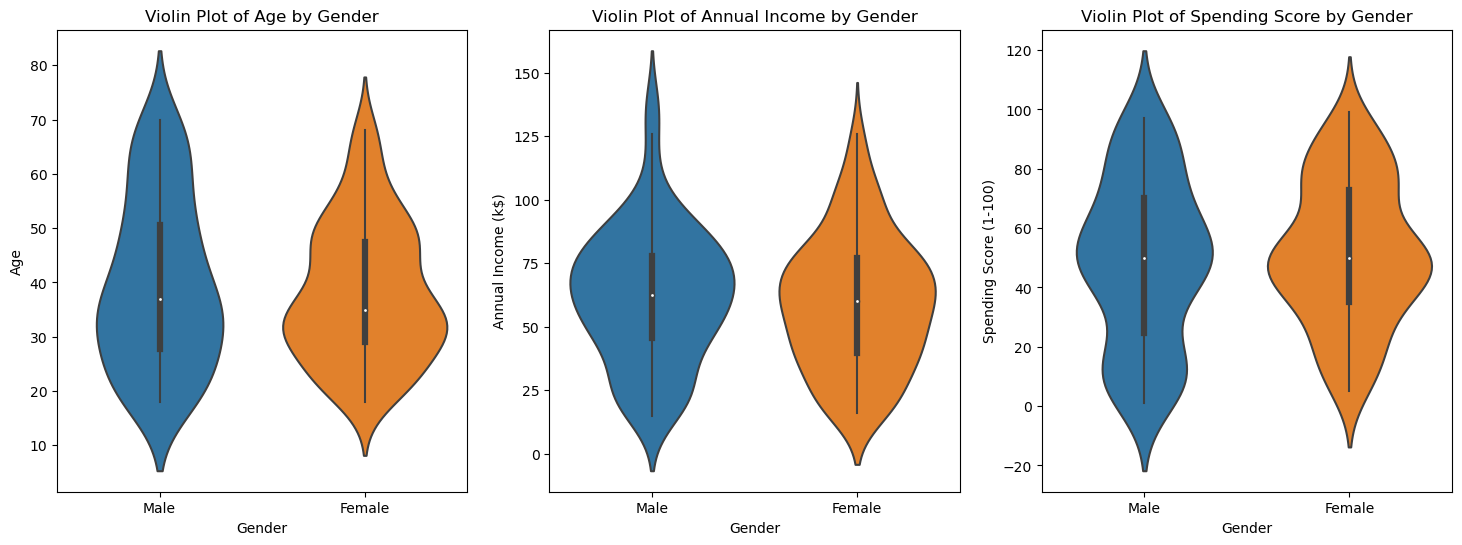

In [10]:
# Boxplots for each numeric variable
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(y=data2['Age'], ax=ax[0]).set(title='Boxplot of Age')
sns.boxplot(y=data2['Annual Income (k$)'], ax=ax[1]).set(title='Boxplot of Annual Income')
sns.boxplot(y=data2['Spending Score (1-100)'], ax=ax[2]).set(title='Boxplot of Spending Score')
plt.show()

# Violin plots for numeric variables split by Gender
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.violinplot(x='Gender', y='Age', data=data2, ax=ax[0]).set(title='Violin Plot of Age by Gender')
sns.violinplot(x='Gender', y='Annual Income (k$)', data=data2, ax=ax[1]).set(title='Violin Plot of Annual Income by Gender')
sns.violinplot(x='Gender', y='Spending Score (1-100)', data=data2, ax=ax[2]).set(title='Violin Plot of Spending Score by Gender')
plt.show()


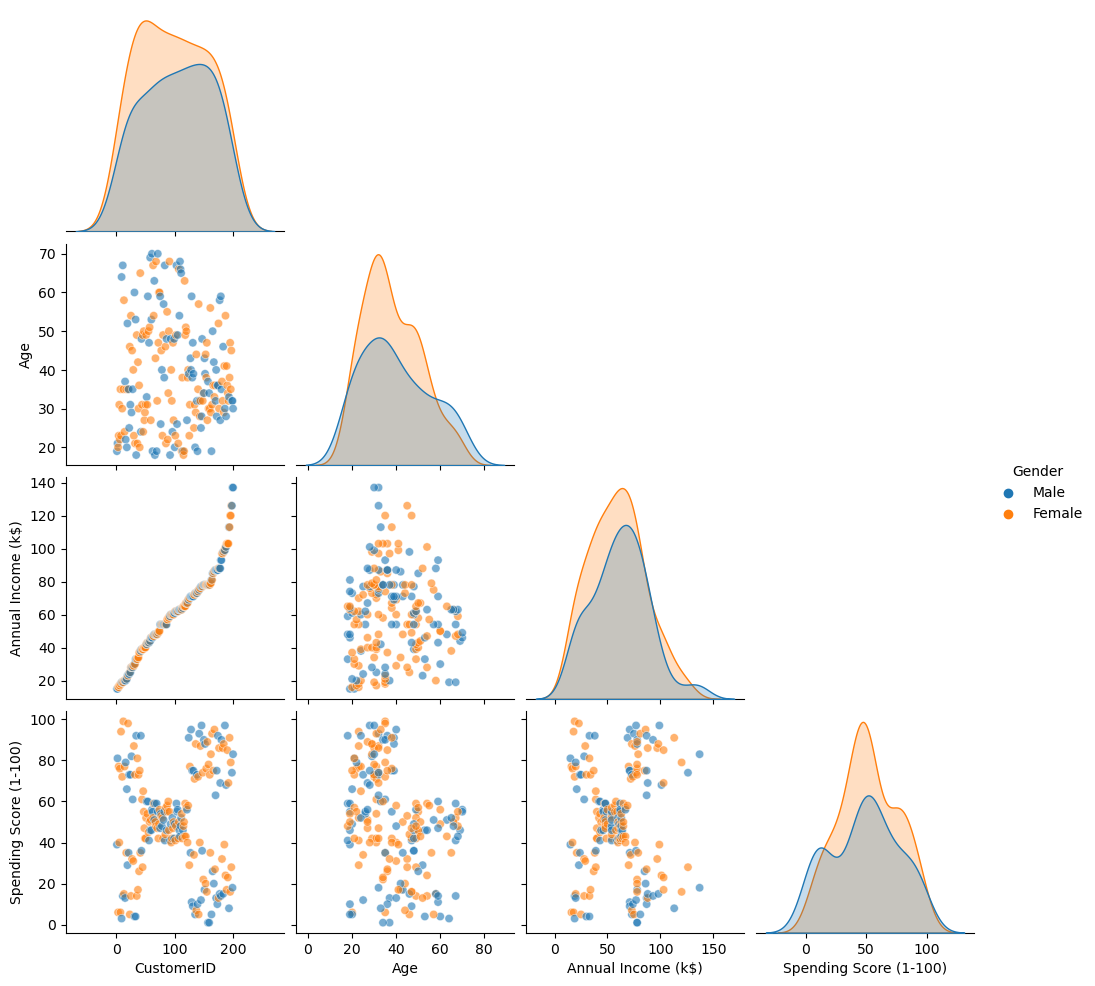

In [11]:
data2 = data2.dropna()
data2['Age'] = pd.to_numeric(data2['Age'], errors='coerce')
data2['Annual Income (k$)'] = pd.to_numeric(data2['Annual Income (k$)'], errors='coerce')
data2['Spending Score (1-100)'] = pd.to_numeric(data2['Spending Score (1-100)'], errors='coerce')

# Pairplot for all numeric variables colored by Gender
sns.pairplot(data2.dropna(subset=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']), hue='Gender', diag_kind='kde', plot_kws={'alpha': 0.6}, corner=True)
plt.show()


## Bivariate analysis

In [12]:
# Calculating the mean of the specified columns, grouped by Gender
grouped_means = data2.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Display the result
grouped_means


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [13]:
data2[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


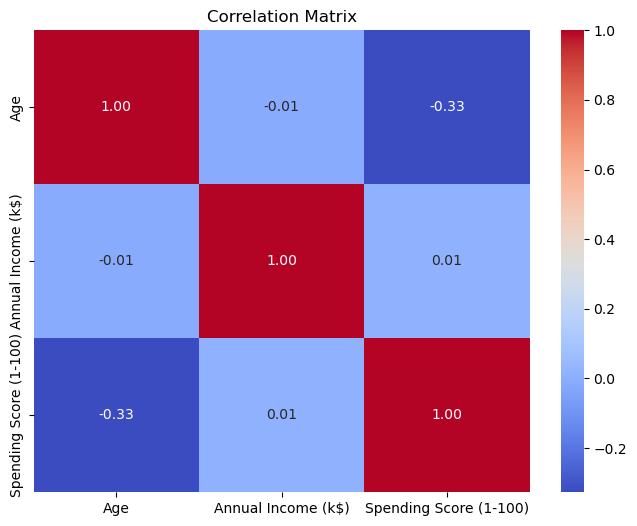

In [14]:
# Correlation Matrix and Heatmap
corr = data2[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()


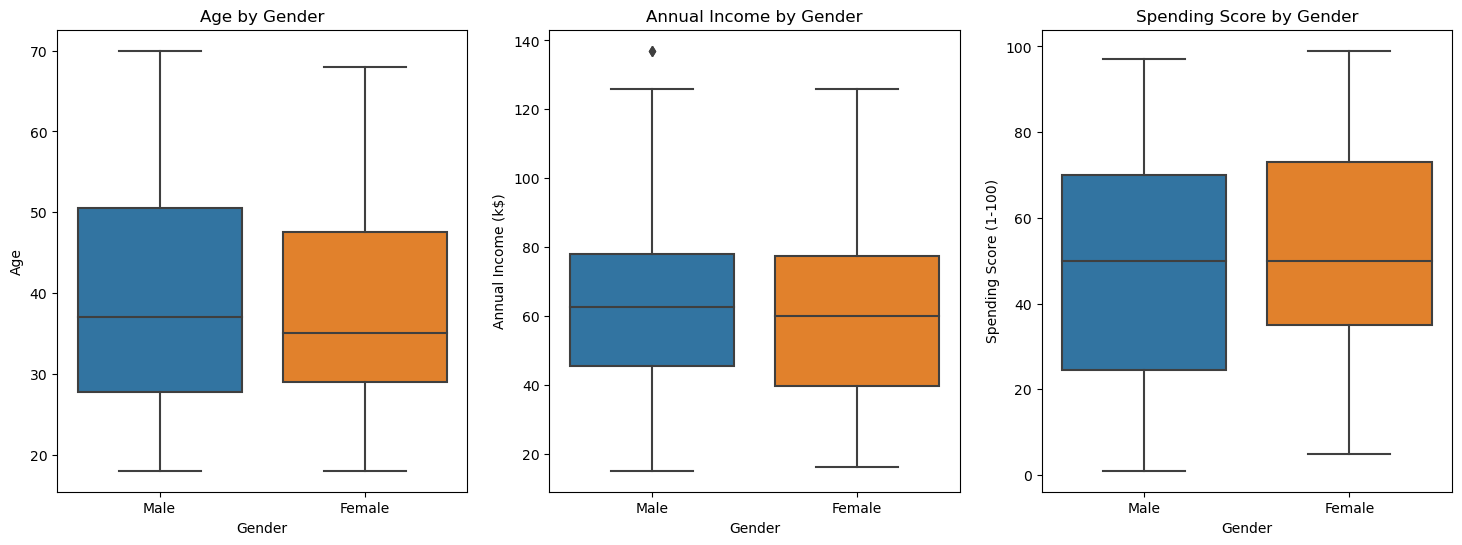

In [15]:
# Boxplots of numerical variables by Gender
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(x='Gender', y='Age', data=data2, ax=ax[0])
ax[0].set_title('Age by Gender')
sns.boxplot(x='Gender', y='Annual Income (k$)', data=data2, ax=ax[1])
ax[1].set_title('Annual Income by Gender')
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data2, ax=ax[2])
ax[2].set_title('Spending Score by Gender')
plt.show()

## clustering

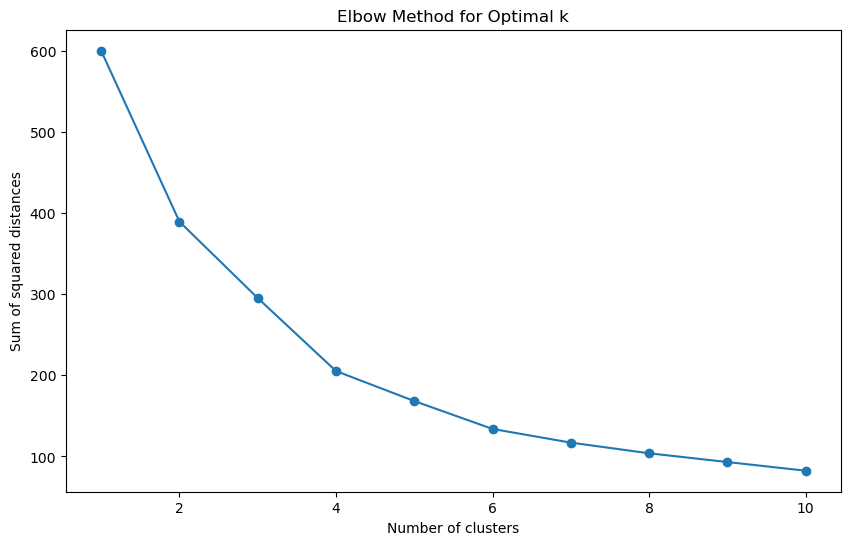

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Data Preprocessing
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data2[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()


## K-Means Clustering with 5 Clusters

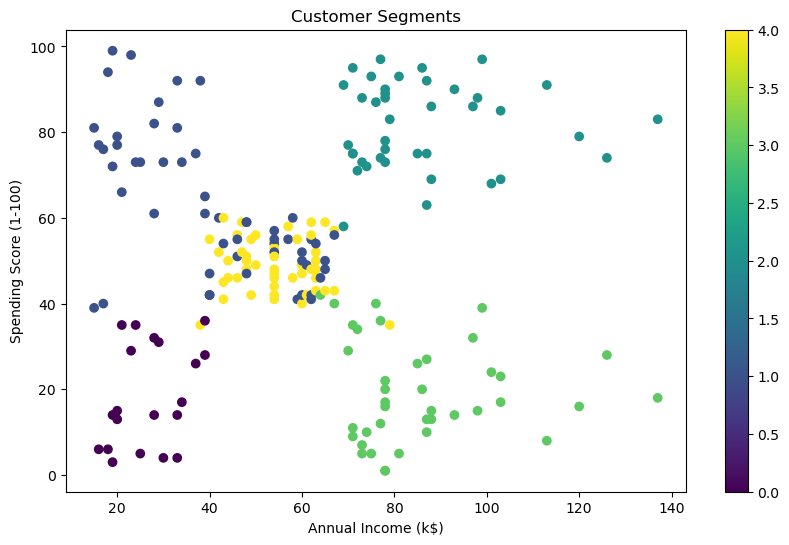

In [17]:
# Applying K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Adding the cluster labels to the data
data2['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data2['Annual Income (k$)'], data2['Spending Score (1-100)'], c=data2['Cluster'], cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar()
plt.show()


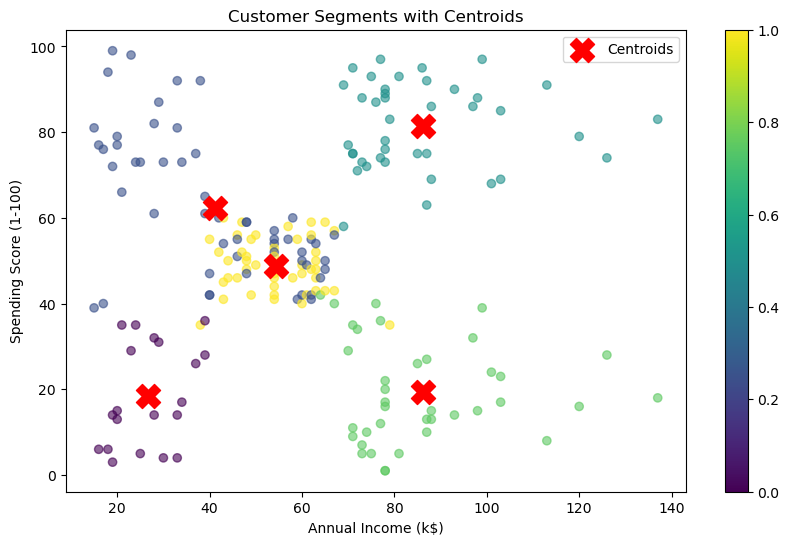

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = data2
# Preprocess and scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Applying K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Extracting centroids
centroids = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids)

# Plotting the clusters along with centroids
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', alpha=0.6)
plt.scatter(centroids_original[:, 1], centroids_original[:, 2], s=300, c='red', marker='X', label='Centroids')
plt.title('Customer Segments with Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar()
plt.legend()
plt.show()


In [19]:
data2

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,3
197,198,Male,32,126,74,2
198,199,Male,32,137,18,3


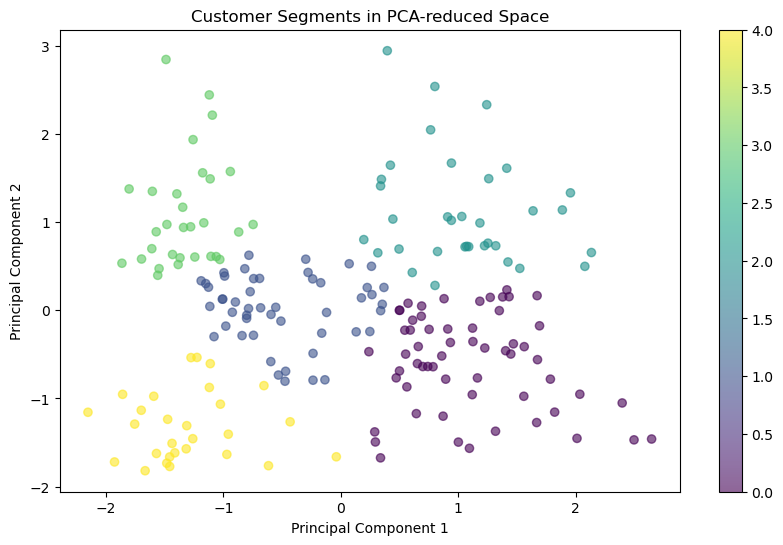

In [20]:
from sklearn.decomposition import PCA

# Performing PCA
pca = PCA(n_components=2)  # Reduce to two dimensions for visualization
data_pca = pca.fit_transform(data_scaled)

# Clustering on PCA-reduced data
kmeans_pca = KMeans(n_clusters=5, random_state=42)
clusters_pca = kmeans_pca.fit_predict(data_pca)

# Plotting the PCA-reduced clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_pca, cmap='viridis', alpha=0.6)
plt.title('Customer Segments in PCA-reduced Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


## Saving the Cluster dataset

In [21]:
data2.to_csv('C:\\Users\\Rishu Jaiswal\\Maths_Customer_Segmentation\\clustered_data.csv', index=False)

In [22]:
features = data2[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

## Spliting the data

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Prepare data
X_train, X_test, y_train, y_test = train_test_split(features, data['Cluster'], test_size=0.2, random_state=42)

# Initialize and train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       0.92      1.00      0.96        12
           4       1.00      0.89      0.94         9

    accuracy                           0.97        40
   macro avg       0.98      0.98      0.98        40
weighted avg       0.98      0.97      0.97        40



## Saving the Model

In [24]:
import pickle
# Save the model to disk
filename = 'finalized_model.sav'
with open(filename, 'wb') as file:
    pickle.dump(clf, file)
print("Model saved successfully!")

# Load the model from disk
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)
print("Model loaded successfully!")

# Use the loaded model to make predictions
predictions = loaded_model.predict(X_test)
print("Predictions:", predictions)

Model saved successfully!
Model loaded successfully!
Predictions: [1 1 0 3 3 1 1 3 3 1 4 3 2 1 3 2 4 3 4 1 3 0 3 3 1 4 1 4 2 3 1 0 4 1 3 4 2
 2 3 4]


In [25]:
data_scaled
data['Cluster']

0      1
1      1
2      0
3      1
4      1
      ..
195    2
196    3
197    2
198    3
199    2
Name: Cluster, Length: 200, dtype: int32

In [26]:
pd.DataFrame(data_scaled)

,0,1,2
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054
